In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,add_dummy_feature,StandardScaler


In [2]:
Data=pd.read_excel("/Users/alok.g.v/Desktop/python practice/datasets/Airline Fare Predictions/train.xlsx")
Data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price,Unnamed: 11,Unnamed: 12
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898,NaN,NaN
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663,NaN,NaN
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883,NaN,NaN
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219,NaN,NaN
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4108,NaN,NaN
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4146,NaN,NaN
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7230,NaN,NaN
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12649,NaN,NaN


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Date_of_Journey  10683 non-null  object 
 2   Source           10683 non-null  object 
 3   Destination      10683 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10683 non-null  object 
 6   Arrival_Time     10683 non-null  object 
 7   Duration         10683 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional Info  10683 non-null  object 
 10  Price            10683 non-null  int64  
 11  Unnamed: 11      0 non-null      float64
 12  Unnamed: 12      0 non-null      float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [4]:
nan=Data[Data['Total_Stops'].isna()==True]
nan

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price,Unnamed: 11,Unnamed: 12
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7481,NaN,NaN


# Converting data into date and time

In [5]:
Data['Date_of_Journey']=pd.to_datetime(Data['Date_of_Journey'])
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Unnamed: 11      0 non-null      float64       
 12  Unnamed: 12      0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.1+ MB


# Converting Duration (str format ) to time delta

In [6]:
Data['Duration']=pd.to_timedelta(Data['Duration'])
Data['Duration'].sort_values()

6474    0 days 00:05:00
4806    0 days 01:15:00
1416    0 days 01:15:00
2083    0 days 01:15:00
3986    0 days 01:15:00
              ...      
7906    1 days 17:20:00
5953    1 days 18:05:00
8409    1 days 18:45:00
1067    1 days 23:00:00
10456   1 days 23:40:00
Name: Duration, Length: 10683, dtype: timedelta64[ns]

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Airline          10683 non-null  object         
 1   Date_of_Journey  10683 non-null  datetime64[ns] 
 2   Source           10683 non-null  object         
 3   Destination      10683 non-null  object         
 4   Route            10682 non-null  object         
 5   Dep_Time         10683 non-null  object         
 6   Arrival_Time     10683 non-null  object         
 7   Duration         10683 non-null  timedelta64[ns]
 8   Total_Stops      10682 non-null  object         
 9   Additional Info  10683 non-null  object         
 10  Price            10683 non-null  int64          
 11  Unnamed: 11      0 non-null      float64        
 12  Unnamed: 12      0 non-null      float64        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8), timedelta64[ns](1)
me

# Distribution of unique catagorical data in the dataset 

In [8]:
value_count=['Airline','Source','Destination','Route','Total_Stops']
for i in value_count:
    print("Value Count of ", i,'\n')
    print(Data[i].value_counts())
    print('\n\n')

Value Count of  Airline 

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64



Value Count of  Source 

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64



Value Count of  Destination 

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64



Value Count of  Route 

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR               

In [9]:
mis_count=['Airline','Route','Total_Stops','Duration','Price']


for i in mis_count:
    print(f"The numner of missing values in {[i]} is :",Data[i].isnull().sum() )



The numner of missing values in ['Airline'] is : 0
The numner of missing values in ['Route'] is : 1
The numner of missing values in ['Total_Stops'] is : 1
The numner of missing values in ['Duration'] is : 0
The numner of missing values in ['Price'] is : 0


In [10]:
print(Data[Data['Route'].isna()==True])
print('\n')
print(Data[Data['Total_Stops'].isna()==True])




        Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India      2019-06-05  Delhi      Cochin   NaN    09:45   

      Arrival_Time        Duration Total_Stops Additional Info  Price  \
9039  09:25 07 May 0 days 23:40:00         NaN         No info   7481   

      Unnamed: 11  Unnamed: 12  
9039          NaN          NaN  


        Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India      2019-06-05  Delhi      Cochin   NaN    09:45   

      Arrival_Time        Duration Total_Stops Additional Info  Price  \
9039  09:25 07 May 0 days 23:40:00         NaN         No info   7481   

      Unnamed: 11  Unnamed: 12  
9039          NaN          NaN  


In [11]:
Data.drop([9039],inplace=True)


# Relationship between Airline company and airline fair 

<AxesSubplot:xlabel='Airline', ylabel='Price'>

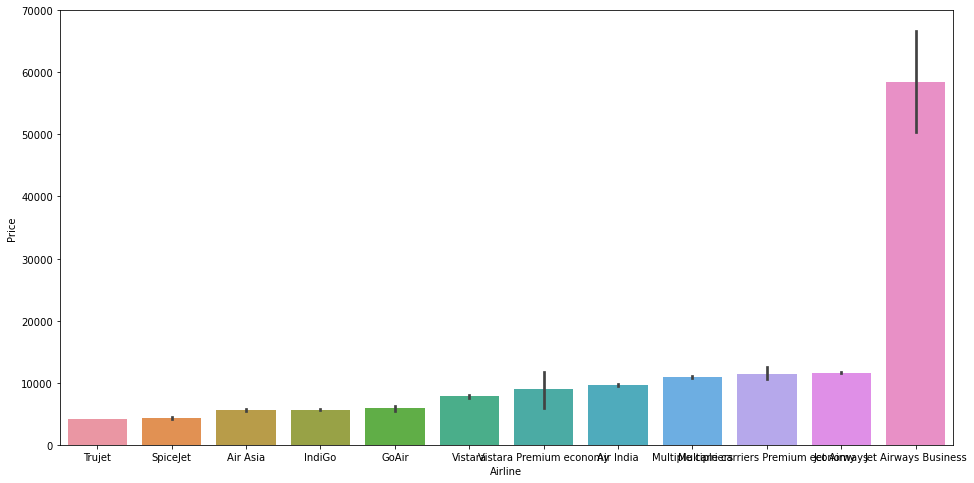

In [12]:
plt.figure(figsize=(16,8))
result=Data.groupby(['Airline'])['Price'].aggregate(np.mean).reset_index().sort_values("Price")
sns.barplot(x='Airline',y='Price',data=Data,order=result['Airline'])

# There is a slight  variation in price per company but as the dataset is not evely distributed for every company there could be bias 
## we can proceed with One hot encoding to deliver better results 

# Relationship between Route taken by the flight and price of the ticket 

<AxesSubplot:xlabel='Route', ylabel='Price'>

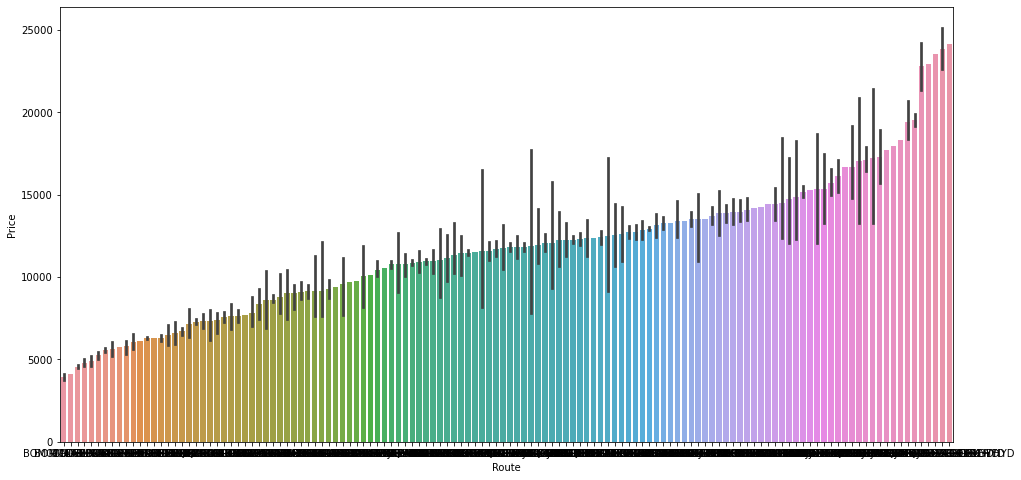

In [13]:
plt.figure(figsize=(16,8))
result=Data.groupby(['Route'])['Price'].aggregate(np.mean).reset_index().sort_values("Price")
sns.barplot(x='Route',y='Price',data=Data,order=result['Route'])

In [14]:
list_route=result['Route'].values
list_route

array(['BOM → HYD', 'BOM → NDC → HYD', 'CCU → BLR', 'MAA → CCU',
       'CCU → HYD → BLR', 'CCU → MAA → BLR', 'BLR → DEL',
       'DEL → AMD → COK', 'BLR → STV → DEL', 'CCU → BBI → HYD → BLR',
       'CCU → BBI → BLR', 'CCU → RPR → HYD → BLR', 'CCU → NAG → BLR',
       'CCU → VTZ → BLR', 'DEL → COK', 'BLR → HYD → DEL',
       'DEL → PNQ → COK', 'CCU → PNQ → BLR', 'DEL → LKO → COK',
       'DEL → HYD → COK', 'DEL → MAA → COK', 'BLR → LKO → DEL',
       'CCU → IXR → BBI → BLR', 'DEL → BLR → COK', 'BLR → IDR → DEL',
       'CCU → GAU → BLR', 'BOM → GOI → HYD', 'DEL → TRV → COK',
       'CCU → AMD → BLR', 'BOM → MAA → HYD', 'CCU → KNU → BLR',
       'BLR → GOI → DEL', 'BLR → VGA → DEL', 'BOM → BLR → HYD',
       'DEL → MAA → BOM → COK', 'DEL → HYD → MAA → COK',
       'BLR → COK → DEL', 'BLR → CCU → BBI → DEL', 'CCU → IXB → BLR',
       'CCU → IXA → BLR', 'BLR → VGA → HYD → DEL',
       'BOM → COK → MAA → HYD', 'BOM → RPR → VTZ → HYD',
       'CCU → BOM → HBX → BLR', 'CCU → BOM → PNQ → BLR

In [15]:
result

,Route,Price
48,BOM → HYD,3933.809984
55,BOM → NDC → HYD,4141.000000
64,CCU → BLR,4557.055249
127,MAA → CCU,4790.892388
80,CCU → HYD → BLR,4911.018868
...,...,...
38,BOM → BDQ → DEL → HYD,22793.500000
57,BOM → UDR → DEL → HYD,22951.000000
58,BOM → VNS → DEL → HYD,23529.000000
51,BOM → JDH → DEL → HYD,23868.000000


# Observations 
## For 128 unique routes taken there is a linear realtionship with the price 
## we can use label encoding on this order 


# Relationship between Number of stops and the price of the ticket

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

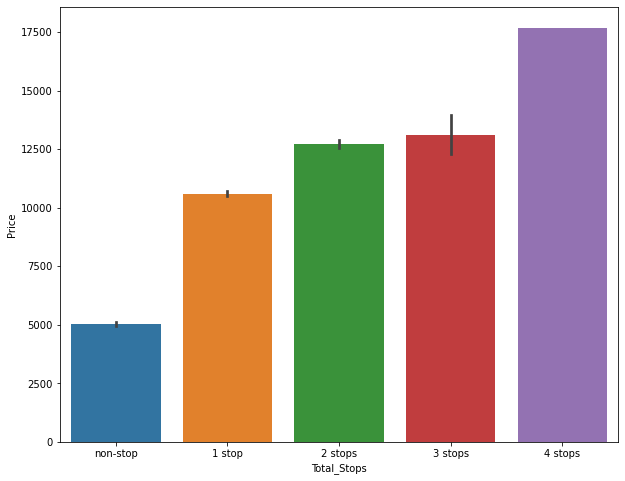

In [16]:
plt.figure(figsize=(10,8))
result=Data.groupby(['Total_Stops'])['Price'].aggregate(np.mean).reset_index().sort_values("Price")
sns.barplot(x='Total_Stops',y='Price',data=Data,order=result['Total_Stops'])

# Observation
## As the number of stops increases so does the ticket price 
## We can Label encode this the same order 

# Data Encodeing 

# OnehotEncoding - Airline company

In [17]:
Airline=pd.get_dummies(Data['Airline'])
Airline=pd.DataFrame(Airline)
Airline

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0,0,0,0
10679,0,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,0,1,0


# Label Encoding - Number of stops 

In [18]:
le=LabelEncoder()
Data['Total_Stops']=le.fit_transform(Data['Total_Stops'])
Data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price,Unnamed: 11,Unnamed: 12
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0 days 02:50:00,4,No info,3898,NaN,NaN
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,0 days 07:25:00,1,No info,7663,NaN,NaN
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,0 days 19:00:00,1,No info,13883,NaN,NaN
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,0 days 05:25:00,0,No info,6219,NaN,NaN
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,0 days 04:45:00,0,No info,13303,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,0 days 02:30:00,4,No info,4108,NaN,NaN
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,0 days 02:35:00,4,No info,4146,NaN,NaN
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,0 days 03:00:00,4,No info,7230,NaN,NaN
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,0 days 02:40:00,4,No info,12649,NaN,NaN


# Label Encoding - Route Taken


In [19]:
le=LabelEncoder()
le=le.fit(Data['Route'])
print(le.classes_)
le.classes_ = list_route
print(le.classes_)
Data['Route']=le.transform(Data['Route'])
Data['Route']

['BLR → AMD → DEL' 'BLR → BBI → DEL' 'BLR → BDQ → DEL'
 'BLR → BOM → AMD → DEL' 'BLR → BOM → BHO → DEL' 'BLR → BOM → DEL'
 'BLR → BOM → IDR → DEL' 'BLR → BOM → IDR → GWL → DEL'
 'BLR → BOM → IXC → DEL' 'BLR → BOM → JDH → DEL' 'BLR → BOM → NAG → DEL'
 'BLR → BOM → UDR → DEL' 'BLR → CCU → BBI → DEL'
 'BLR → CCU → BBI → HYD → DEL' 'BLR → CCU → BBI → HYD → VGA → DEL'
 'BLR → CCU → DEL' 'BLR → CCU → GAU → DEL' 'BLR → COK → DEL' 'BLR → DEL'
 'BLR → GAU → DEL' 'BLR → GOI → DEL' 'BLR → HBX → BOM → AMD → DEL'
 'BLR → HBX → BOM → BHO → DEL' 'BLR → HBX → BOM → NAG → DEL'
 'BLR → HYD → DEL' 'BLR → HYD → VGA → DEL' 'BLR → IDR → DEL'
 'BLR → LKO → DEL' 'BLR → MAA → DEL' 'BLR → NAG → DEL' 'BLR → PNQ → DEL'
 'BLR → STV → DEL' 'BLR → TRV → COK → DEL' 'BLR → VGA → DEL'
 'BLR → VGA → HYD → DEL' 'BLR → VGA → VTZ → DEL' 'BOM → AMD → ISK → HYD'
 'BOM → BBI → HYD' 'BOM → BDQ → DEL → HYD' 'BOM → BHO → DEL → HYD'
 'BOM → BLR → CCU → BBI → HYD' 'BOM → BLR → HYD' 'BOM → CCU → HYD'
 'BOM → COK → MAA → HYD' 'BOM →

0         6
1        22
2        86
3        12
4        56
         ..
10678     2
10679     2
10680     6
10681     6
10682    61
Name: Route, Length: 10682, dtype: int64

In [20]:
# Creating a Final Dataset using relevent features 

In [21]:
Data.drop(columns=['Airline','Source','Destination','Dep_Time','Arrival_Time','Additional Info','Unnamed: 11','Unnamed: 12','Date_of_Journey'],
                         inplace=True)

Data

,Route,Duration,Total_Stops,Price
0,6,0 days 02:50:00,4,3898
1,22,0 days 07:25:00,1,7663
2,86,0 days 19:00:00,1,13883
3,12,0 days 05:25:00,0,6219
4,56,0 days 04:45:00,0,13303
...,...,...,...,...
10678,2,0 days 02:30:00,4,4108
10679,2,0 days 02:35:00,4,4146
10680,6,0 days 03:00:00,4,7230
10681,6,0 days 02:40:00,4,12649


In [22]:
Data=pd.concat([Data,Airline],axis=1)
Data

,Route,Duration,Total_Stops,Price,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,6,0 days 02:50:00,4,3898,0,0,0,1,0,0,0,0,0,0,0,0
1,22,0 days 07:25:00,1,7663,0,1,0,0,0,0,0,0,0,0,0,0
2,86,0 days 19:00:00,1,13883,0,0,0,0,1,0,0,0,0,0,0,0
3,12,0 days 05:25:00,0,6219,0,0,0,1,0,0,0,0,0,0,0,0
4,56,0 days 04:45:00,0,13303,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,0 days 02:30:00,4,4108,1,0,0,0,0,0,0,0,0,0,0,0
10679,2,0 days 02:35:00,4,4146,0,1,0,0,0,0,0,0,0,0,0,0
10680,6,0 days 03:00:00,4,7230,0,0,0,0,1,0,0,0,0,0,0,0
10681,6,0 days 02:40:00,4,12649,0,0,0,0,0,0,0,0,0,0,1,0


In [23]:
Data.reset_index(inplace=True)
Data.drop(columns=['index'],inplace=True,axis=1)
Data

,Route,Duration,Total_Stops,Price,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,6,0 days 02:50:00,4,3898,0,0,0,1,0,0,0,0,0,0,0,0
1,22,0 days 07:25:00,1,7663,0,1,0,0,0,0,0,0,0,0,0,0
2,86,0 days 19:00:00,1,13883,0,0,0,0,1,0,0,0,0,0,0,0
3,12,0 days 05:25:00,0,6219,0,0,0,1,0,0,0,0,0,0,0,0
4,56,0 days 04:45:00,0,13303,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,2,0 days 02:30:00,4,4108,1,0,0,0,0,0,0,0,0,0,0,0
10678,2,0 days 02:35:00,4,4146,0,1,0,0,0,0,0,0,0,0,0,0
10679,6,0 days 03:00:00,4,7230,0,0,0,0,1,0,0,0,0,0,0,0
10680,6,0 days 02:40:00,4,12649,0,0,0,0,0,0,0,0,0,0,1,0


# Converting Duration into secounds 

In [24]:
for i in range(10682):
    Data['Duration'][i]=Data['Duration'][i].seconds

Data['Duration']=Data['Duration'].astype(int)

<ipython-input-24-f7fd790bc3b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Duration'][i]=Data['Duration'][i].seconds


In [25]:
x=['Air Asia','Air India','GoAir','IndiGo','Jet Airways','Jet Airways Business','Multiple carriers','Multiple carriers Premium economy','SpiceJet','Trujet'
  ,'Vistara','Vistara Premium economy','Route','Duration','Total_Stops']
y=['Price']

In [26]:
X=Data[x]
y=Data[y]
X

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Route,Duration,Total_Stops
0,0,0,0,1,0,0,0,0,0,0,0,0,6,10200,4
1,0,1,0,0,0,0,0,0,0,0,0,0,22,26700,1
2,0,0,0,0,1,0,0,0,0,0,0,0,86,68400,1
3,0,0,0,1,0,0,0,0,0,0,0,0,12,19500,0
4,0,0,0,1,0,0,0,0,0,0,0,0,56,17100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,1,0,0,0,0,0,0,0,0,0,0,0,2,9000,4
10678,0,1,0,0,0,0,0,0,0,0,0,0,2,9300,4
10679,0,0,0,0,1,0,0,0,0,0,0,0,6,10800,4
10680,0,0,0,0,0,0,0,0,0,0,1,0,6,9600,4


# Spliting data into test and train sets 

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8011 entries, 1151 to 7159
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Air Asia                           8011 non-null   uint8
 1   Air India                          8011 non-null   uint8
 2   GoAir                              8011 non-null   uint8
 3   IndiGo                             8011 non-null   uint8
 4   Jet Airways                        8011 non-null   uint8
 5   Jet Airways Business               8011 non-null   uint8
 6   Multiple carriers                  8011 non-null   uint8
 7   Multiple carriers Premium economy  8011 non-null   uint8
 8   SpiceJet                           8011 non-null   uint8
 9   Trujet                             8011 non-null   uint8
 10  Vistara                            8011 non-null   uint8
 11  Vistara Premium economy            8011 non-null   uint8
 12  Route            

# Scaling the data

In [28]:
Scaler=StandardScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)

# Regression Model 

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt




In [30]:
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
lr_r2=r2_score(y_test, y_pred)
print("R squared: ",lr_r2)
print("Average Coefficients: ",abs(lr_model.coef_).mean())
print("Root Mean Squared Error: ",sqrt(mean_squared_error(y_test, y_pred)))





R squared:  -7.503649853420881e+18
Average Coefficients:  105768582337557.31
Root Mean Squared Error:  12788446020704.605


In [31]:
lcv=LassoCV(alphas=(.001, .001, .01, .1, .5, 1,10,25,30,35,40,41,42,43,44,45,46,47,48,49,50,60,100), cv=5)
lcv_model=lcv.fit(X_train,y_train)
y_pred_lcv=lcv_model.predict(X_test)
lcv_r2=r2_score(y_test,y_pred_lcv)

print("Alpha Value: ",lcv_model.alpha_)

print("R squared: ",lcv_r2)
print("Average Coefficients: ",abs(lcv_model.coef_).mean())
print("Root Mean Squared Error: ",sqrt(mean_squared_error(y_test, y_pred_lcv)))




Alpha Value:  10.0
R squared:  0.6537778412185056
Average Coefficients:  409.3723795786598
Root Mean Squared Error:  2747.0016773577736


/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [32]:
rcv=RidgeCV(alphas=(.001, .001, .01, .1, .5, 1,2,3,4,5,6,7,8,9,10),cv=5)
rcv_model=rcv.fit(X_train,y_train)
y_pred_rcv=rcv_model.predict(X_test)
rcv_r2=r2_score(y_test,y_pred_rcv)

print("Alpha Value: ",rcv_model.alpha_)

print("R squared: ",rcv_r2)
print("Average Coefficients: ",abs(rcv_model.coef_).mean())
print("Root Mean Squared Error: ",sqrt(mean_squared_error(y_test, y_pred_rcv)))




Alpha Value:  10.0
R squared:  0.653677249177127
Average Coefficients:  419.4782524916356
Root Mean Squared Error:  2747.400707909684


#  XGB Regressor

In [33]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV



In [34]:
"""param_grid={'max_depth':[5,6,7],
            'n_estimators': [900,1000,1100],
            'learning_rate': [0.02,0.03]}
regressor=xgb.XGBRegressor()
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)
print("The best hyperparameters are ",search.best_params_)"""



'param_grid={\'max_depth\':[5,6,7],\n            \'n_estimators\': [900,1000,1100],\n            \'learning_rate\': [0.02,0.03]}\nregressor=xgb.XGBRegressor()\nsearch = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)\nprint("The best hyperparameters are ",search.best_params_)'

In [35]:
regressor=xgb.XGBRegressor(learning_rate=0.02,n_estimators=900)
regressor=regressor.fit(X_train,y_train)
y_pred_XGB=regressor.predict(X_test)
y_pred_XGB

array([ 6485.4854,  6938.9443,  9264.306 , ...,  6129.629 , 12125.712 ,
        4746.14  ], dtype=float32)

In [36]:
XGB_r2=r2_score(y_test, y_pred)
XGB_r2

-7.503649853420881e+18

# Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor




'''param_grid={'max_depth':[2,3,4,5],
            'n_estimators': [900,1000,1100]}
regressor=RandomForestRegressor()
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)
print("The best hyperparameters are ",search.best_params_)
'''



'param_grid={\'max_depth\':[2,3,4,5],\n            \'n_estimators\': [900,1000,1100]}\nregressor=RandomForestRegressor()\nsearch = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)\nprint("The best hyperparameters are ",search.best_params_)\n'

In [38]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(max_depth=5,n_estimators = 1000, random_state = 0) 
regressor.fit(X_train, y_train)  
y_pred_test = regressor.predict(X_test)
display(regressor.score(X_test,y_test))

<ipython-input-38-4fef66a15822>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


0.6697877283573126

# Result from the differrent models created 
## Random Forest Regressor gave us the best result.